# Power Transformation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

In [2]:
df = pd.read_csv(r"C:\Users\kumar\Downloads\ML-Projects\Datasets\sample_dataset.csv").iloc[:,0:5].dropna()
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
8,13.00,21.82,87.50,519.8,0.12730
13,15.85,23.95,103.70,782.7,0.08401
14,13.73,22.61,93.60,578.3,0.11310
...,...,...,...,...,...
549,10.82,24.21,68.89,361.6,0.08192
550,10.86,21.48,68.51,360.5,0.07431
560,14.05,27.15,91.38,600.4,0.09929
564,21.56,22.39,142.00,1479.0,0.11100


<Axes: >

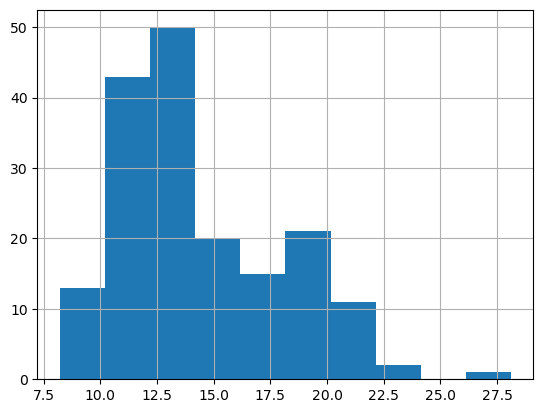

In [3]:
df['mean radius'].hist()

### Yeo-Johnson Power Transformation
###### With Standardization

In [4]:
power = PowerTransformer()

In [5]:
t = power.fit_transform(df)

(array([ 4.,  7., 13., 34., 39., 22., 20., 27.,  9.,  1.]),
 array([-2.54500995, -2.03906966, -1.53312936, -1.02718906, -0.52124877,
        -0.01530847,  0.49063182,  0.99657212,  1.50251242,  2.00845271,
         2.51439301]),
 <BarContainer object of 10 artists>)

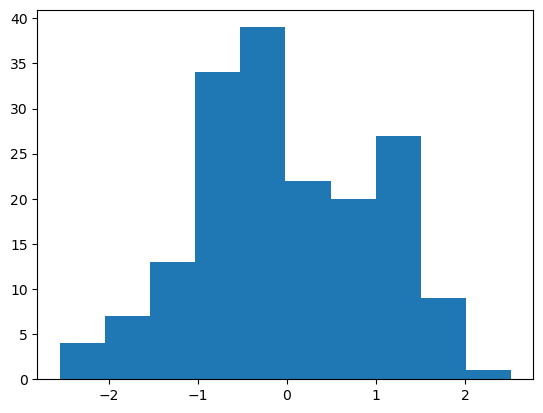

In [6]:
plt.hist(t[:,0])

###### Withoput Standardization

In [7]:
power = PowerTransformer(standardize=False)

In [8]:
u = power.fit_transform(df)

(array([ 4.,  7., 13., 34., 39., 22., 20., 27.,  9.,  1.]),
 array([1.15402499, 1.17204759, 1.19007019, 1.20809279, 1.22611538,
        1.24413798, 1.26216058, 1.28018318, 1.29820578, 1.31622838,
        1.33425098]),
 <BarContainer object of 10 artists>)

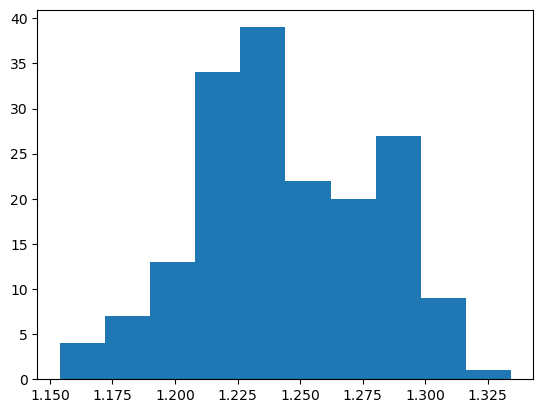

In [9]:
plt.hist(u[:,0])

### Box- Cox Transformation
##### Only with Positive Features

In [10]:
power = PowerTransformer('box-cox')
v = power.fit_transform(df)

(array([ 4.,  7., 12., 34., 40., 22., 20., 28.,  8.,  1.]),
 array([-2.55704087, -2.04914834, -1.54125581, -1.03336328, -0.52547074,
        -0.01757821,  0.49031432,  0.99820685,  1.50609938,  2.01399191,
         2.52188444]),
 <BarContainer object of 10 artists>)

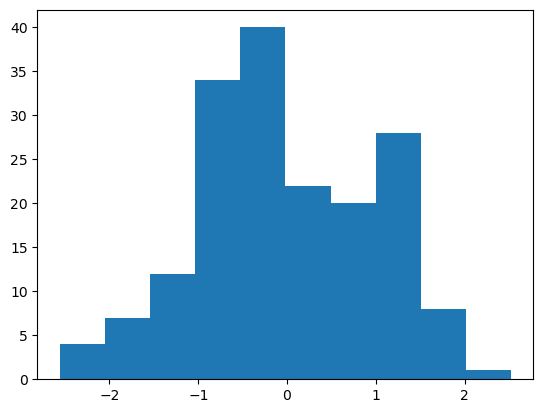

In [11]:
plt.hist(v[:,0])

# Binning

#### With Uniform width

In [12]:
from sklearn.preprocessing import KBinsDiscretizer

In [22]:
binner = KBinsDiscretizer(strategy='uniform', n_bins=5)
np.unique(binner.fit_transform(df)[:,0], return_counts=True)

(array([<176x1 sparse matrix of type '<class 'numpy.float64'>'
        	with 56 stored elements in Compressed Sparse Row format>],
       dtype=object),
 array([1], dtype=int64))

##### Using Defined Encoding

In [24]:
binner = KBinsDiscretizer(strategy='uniform', n_bins=5, encode='onehot-dense')

In [32]:
binner.fit_transform(df)

array([[0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

# Using K means for Binning

In [35]:
binner = KBinsDiscretizer(strategy="kmeans", n_bins=5, encode="ordinal")
binner.fit_transform(df)

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

array([[3., 2., 3., 2., 3.],
       [0., 1., 0., 0., 4.],
       [1., 2., 1., 0., 4.],
       [2., 2., 2., 1., 1.],
       [1., 2., 1., 0., 3.],
       [3., 2., 3., 2., 2.],
       [1., 0., 1., 0., 3.],
       [0., 0., 0., 0., 2.],
       [2., 1., 2., 1., 3.],
       [1., 2., 1., 1., 2.],
       [2., 2., 2., 1., 3.],
       [3., 3., 3., 2., 1.],
       [1., 1., 1., 0., 1.],
       [1., 2., 1., 0., 2.],
       [3., 2., 3., 2., 1.],
       [1., 1., 1., 0., 2.],
       [3., 1., 3., 2., 3.],
       [0., 1., 0., 0., 1.],
       [2., 1., 2., 2., 3.],
       [1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 2.],
       [0., 0., 0., 0., 0.],
       [1., 2., 1., 0., 3.],
       [0., 1., 0., 0., 2.],
       [0., 0., 0., 0., 2.],
       [1., 0., 1., 0., 2.],
       [1., 0., 1., 0., 4.],
       [3., 2., 3., 2., 4.],
       [0., 1., 0., 0., 2.],
       [1., 0., 1., 0., 4.],
       [1., 1., 1., 1., 0.],
       [0., 1., 0., 0., 3.],
       [3., 1., 2., 2., 2.],
       [3., 1., 3., 2., 0.],
       [2., 1.

# Quantized Binning
###### Each bean use same number of values

In [34]:
binner = KBinsDiscretizer(strategy="quantile", n_bins=3, encode="ordinal")
binner.fit_transform(df)

array([[2., 2., 2., 2., 2.],
       [0., 1., 0., 0., 2.],
       [1., 2., 1., 1., 2.],
       [2., 2., 2., 2., 0.],
       [1., 2., 1., 1., 2.],
       [2., 2., 2., 2., 1.],
       [1., 0., 1., 1., 2.],
       [0., 0., 0., 0., 1.],
       [2., 0., 2., 2., 2.],
       [1., 2., 1., 1., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 1.],
       [1., 1., 1., 1., 1.],
       [1., 2., 1., 1., 1.],
       [2., 2., 2., 2., 1.],
       [1., 1., 1., 1., 2.],
       [2., 1., 2., 2., 2.],
       [0., 1., 0., 0., 0.],
       [2., 1., 2., 2., 2.],
       [1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [1., 2., 1., 1., 2.],
       [0., 1., 0., 0., 2.],
       [0., 0., 0., 0., 1.],
       [1., 0., 1., 1., 1.],
       [1., 0., 1., 1., 2.],
       [2., 2., 2., 2., 2.],
       [0., 1., 0., 0., 1.],
       [1., 0., 1., 1., 2.],
       [1., 1., 1., 1., 0.],
       [0., 1., 0., 0., 2.],
       [2., 1., 2., 2., 2.],
       [2., 1., 2., 2., 0.],
       [1., 0.

# Binarizer

In [37]:
from sklearn.preprocessing import Binarizer
converter = Binarizer(threshold=12)

In [38]:
converter.fit_transform(df)

array([[1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1.

# Arbitrary Transformation

In [39]:
from sklearn.preprocessing import FunctionTransformer
new_df = pd.read_csv(r"C:\Users\kumar\Downloads\ML-Projects\Datasets\sample_dataset.csv").iloc[:,0:3].dropna()
new_df

,mean radius,mean texture,mean perimeter
1,20.57,17.77,132.90
2,19.69,21.25,130.00
3,11.42,20.38,77.58
5,12.45,15.70,82.57
7,13.71,20.83,90.20
...,...,...,...
562,15.22,30.62,103.40
563,20.92,25.09,143.00
564,21.56,22.39,142.00
566,16.60,28.08,108.30


In [40]:
import numpy as np

#### Calculate Log

In [41]:
transformer = FunctionTransformer(np.log, validate=True)
transformer.fit_transform(new_df)

array([[3.0238337 , 2.87751164, 4.88959697],
       [2.98011089, 3.0563569 , 4.86753445],
       [2.4353662 , 3.01455403, 4.35130966],
       ...,
       [3.07083975, 3.10861443, 4.95582706],
       [2.8094027 , 3.33505758, 4.68490515],
       [3.02529108, 3.37861088, 4.94235645]])

#### Custom Function

In [42]:
transformer = FunctionTransformer(lambda x: x**2, validate=True)
transformer.fit_transform(new_df)

array([[  423.1249,   315.7729, 17662.41  ],
       [  387.6961,   451.5625, 16900.    ],
       [  130.4164,   415.3444,  6018.6564],
       ...,
       [  464.8336,   501.3121, 20164.    ],
       [  275.56  ,   788.4864, 11728.89  ],
       [  424.36  ,   860.2489, 19628.01  ]])

###### Passing Arguments

In [43]:
transformer = FunctionTransformer(lambda x,a: x+a, validate=True, kw_args={'a': 4})
transformer.fit_transform(new_df)

array([[ 24.57,  21.77, 136.9 ],
       [ 23.69,  25.25, 134.  ],
       [ 15.42,  24.38,  81.58],
       ...,
       [ 25.56,  26.39, 146.  ],
       [ 20.6 ,  32.08, 112.3 ],
       [ 24.6 ,  33.33, 144.1 ]])

###### Pre defined function

In [44]:
def f(x, a):
    return x*a

In [46]:
transformer = FunctionTransformer(f, validate=True, kw_args={'a': 4}, accept_sparse=True)
transformer.fit_transform(new_df)

array([[ 82.28,  71.08, 531.6 ],
       [ 78.76,  85.  , 520.  ],
       [ 45.68,  81.52, 310.32],
       ...,
       [ 86.24,  89.56, 568.  ],
       [ 66.4 , 112.32, 433.2 ],
       [ 82.4 , 117.32, 560.4 ]])